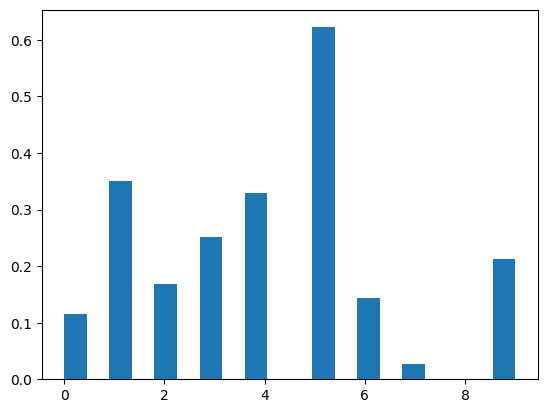

In [2]:
#4 (no *)

import numpy as np
import time
import matplotlib.pyplot as plt

def f(weights, n):
    total = sum(weights)
    norma = [w/total for w in weights]
    a = list(enumerate(norma))
    a.sort(key=lambda x: x[1], reverse=True)
    sample = []
    for _ in range(n):
        r = np.random.random()
        p = 0.0
        for i, weight in a:
            p += weight
            if r <= p:
                sample.append(i)
                break
    return sample

digits = list(range(10))
weights = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]
sample = f(weights, 1000)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(sample, bins=20, density=True)
plt.show()

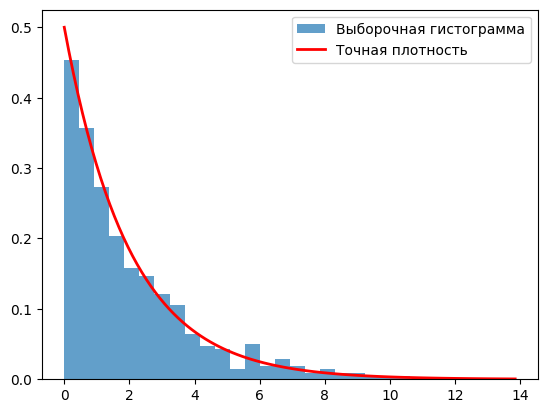

In [54]:
#5 (no *)

def f2(lambd, n):
    u = np.random.uniform(0, 1, n)
    sample = -np.log(1 - u) / lambd
    return sample

l = 0.5
n = 1000

sample1 = f2(lambda_param, sample_size)

sample2 = np.random.exponential(scale=1/l, size=sample_size)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(sample1, bins=30, density=True, alpha=0.7, label='Выборочная гистограмма')
x = np.linspace(0, max(sample1), 100)
plt.plot(x, l * np.exp(-l * x), 'r-', linewidth=2, label='Точная плотность')
plt.legend()
plt.show()

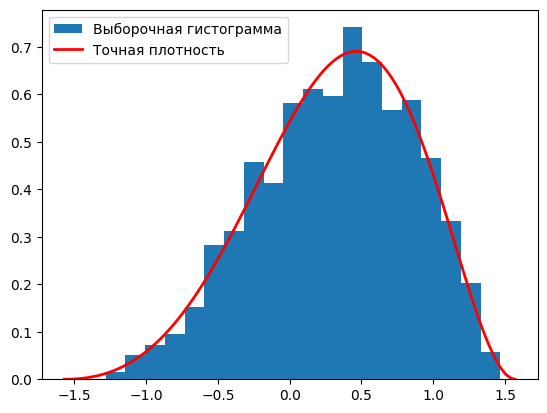

In [52]:
#6 (no *)

from scipy import integrate
def p(x):
    return np.exp(x) * (np.cos(x))**2

def f3(n):
    a = -np.pi/2
    b = np.pi/2
    
    x = np.linspace(a, b, 1000)
    y = p(x)
    M = np.max(y)*1.1

    samples = []
    attempts = 0
    
    while len(samples) < n:
        attempts += 1
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, M)
        if y <= p(x):
            samples.append(x)
            
    return np.array(samples)

a = -np.pi/2
b = np.pi/2
c, _ = integrate.quad(p, a, b)
sample = f3(1000)
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(sample, bins=20, density=True, label='Выборочная гистограмма')
x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2
plt.plot(x, density/ c, 'r-', linewidth=2, label='Точная плотность')
plt.legend()
plt.show()

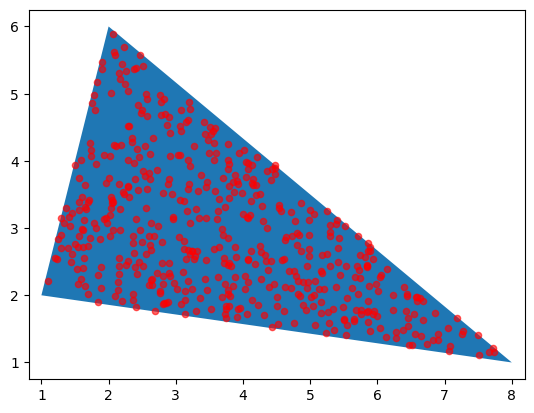

In [6]:
#7 (no *)

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
def f4(vertices, n):
    A, B, C = vertices
    
    points = []
    for i in range(n):
        s, t = np.random.uniform(0, 1, 2)
        
        if s + t > 1:
            s = 1 - s
            t = 1 - t
        
        point = A + s*(B - A) + t*(C - A)
        points.append(point)
    
    return np.array(points)

vertices = np.array([
    [1, 2],
    [2, 6],  
    [8, 1]
])

sample = f4(vertices, 500)


fig = plt.figure()
fig.patch.set_facecolor('white')

polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]))
collection = PatchCollection([polygon])
plt.gca().add_collection(collection)
plt.axis('equal')

plt.scatter(sample[:, 0], sample[:, 1], color='red', alpha=0.6, s=20)
plt.show()

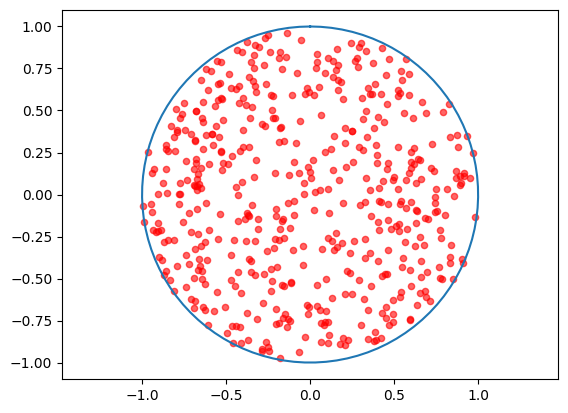

In [5]:
#8 (no *)

def f5(n):
    theta = np.random.uniform(0, 2*np.pi, n)
    r = np.sqrt(np.random.uniform(0, 1, n))
    
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    return np.column_stack((x, y))

sample = f5(500)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.scatter(sample[:, 0], sample[:, 1], color='red', alpha=0.6, s=20)
plt.show()

Точное среднее: [4 7]
Выборочное среднее: [3.97319066 6.76668608]

Точная ковариационная матрица:
[[20 -4]
 [-4 40]]

Выборочная ковариационная матрица:
[[20.28355057 -4.27730462]
 [-4.27730462 39.98755104]]


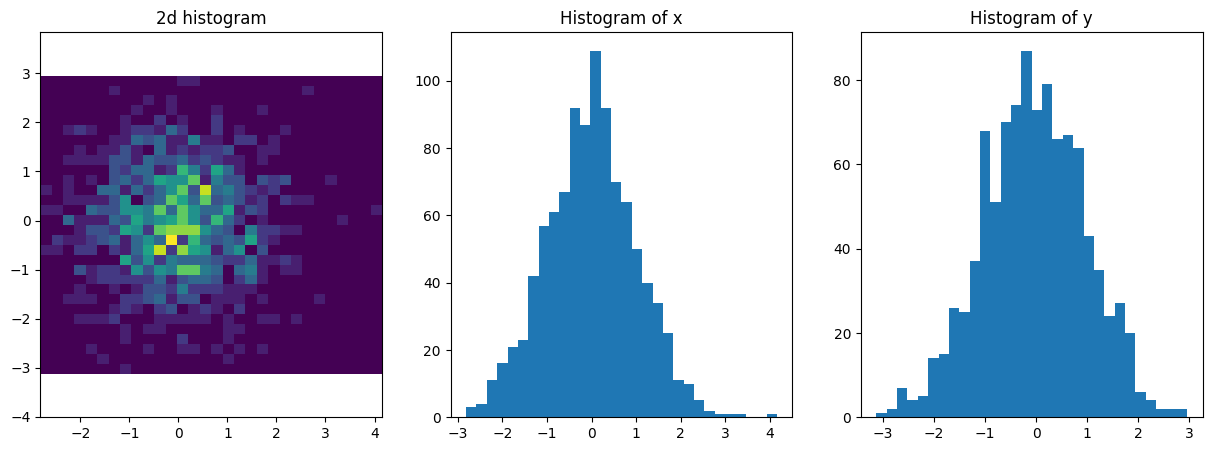

In [10]:
#9 (no *)

def f6(n):
    x = np.zeros(n)
    y = np.zeros(n)
    count = 0
    
    while count < n:
        u1, u2 = np.random.uniform(-1, 1, 2)
        s = u1*u1 + u2*u2

        if 0 < s <= 1:
            factor = np.sqrt(-2 * np.log(s) / s)
            x[count] = u1 * factor
            y[count] = u2 * factor
            count += 1
    
    return x, y


mu = np.array([4, 7])
cov = np.array([[20, -4],
                [-4, 40]])
x, y = f6(1000)

Z = np.column_stack((x, y))
L = np.linalg.cholesky(cov)
sample = mu + Z @ L.T

sample_mean = np.mean(sample, axis=0)
sample_cov = np.cov(sample.T)

print("Точное среднее:", mu)
print("Выборочное среднее:", sample_mean)
print("\nТочная ковариационная матрица:")
print(cov)
print("\nВыборочная ковариационная матрица:")
print(sample_cov)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()